In [3]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [4]:
img_rows=28
img_cols=28
channels=1

img_shape = (img_rows,img_cols,channels)

zdim=100


In [5]:
def build_gen(img_shape,zdim):
    model = Sequential()
    model.add(Dense(128,input_dim=zdim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation='tanh'))
    model.add(Reshape(img_shape))
    return model

In [6]:
def build_dis(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [7]:
def build_gan(gen,dis):
    model = Sequential()
    model.add(gen)
    model.add(dis)
    return model

In [8]:
dis_v = build_dis(img_shape)
dis_v.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
gen_v = build_gen(img_shape,zdim)
dis_v.trainable=False
gan_v = build_gan(gen_v,dis_v)
gan_v.compile(loss='binary_crossentropy',
              optimizer=Adam()
             )

In [10]:
losses=[]
accuracies=[]
iteration_checks=[]

In [11]:
def train(iterations,batch_size,interval):
    
    original_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')
    
    (Xtrain, _),(_, _) = mnist.load_data()
    Xtrain = Xtrain/127.5 - 1.0
    Xtrain = np.expand_dims(Xtrain,axis=3)

    real = np.ones((batch_size,1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        ids = np.random.randint(0,Xtrain.shape[0],batch_size)
        imgs = Xtrain[ids]

        z=np.random.normal(0,1,(batch_size,100))
        gen_imgs = gen_v.predict(z)

        dloss_real = dis_v.train_on_batch(imgs,real)
        dloss_fake = dis_v.train_on_batch(gen_imgs, fake)

        dloss,accuracy = 0.5 * np.add(dloss_real,dloss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        gloss = gan_v.train_on_batch(z,real)

        if (iteration+1) % interval == 0:
            losses.append((dloss,gloss))
            accuracies.append(100.0*accuracy)
            iteration_checks.append(iteration+1)

            sys.stdout = original_stdout
            print("%d [D loss: %f , acc: %.2f] [G loss: %f]" %
                  (iteration+1,dloss,100.0*accuracy,gloss))
            sys.stdout = open(os.devnull, 'w')
            show_images(gen_v)


In [12]:
def show_images(gen):
    z = np.random.normal(0, 1, (16, 100))
    gen_imgs = gen.predict(z)
    gen_imgs = 0.5*gen_imgs + 0.5

    fig,axs = plt.subplots(4,4,figsize=(4,4),sharey=True,sharex=True)

    cnt=0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt,:,:,0],cmap='gray')
            axs[i, j].axis('off')
            cnt+=1

    plt.show()



1000 [D loss: 0.026336 , acc: 100.00] [G loss: 4.799130]


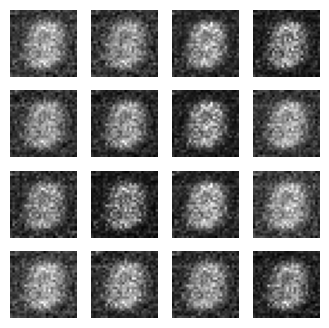

2000 [D loss: 0.160615 , acc: 95.70] [G loss: 3.617060]


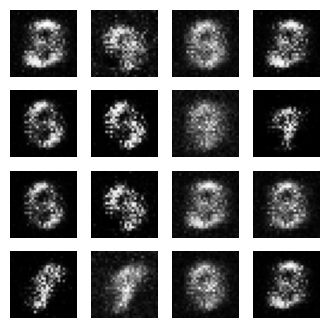

3000 [D loss: 0.188198 , acc: 90.62] [G loss: 4.571705]


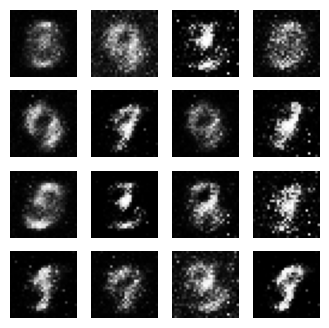

4000 [D loss: 0.187803 , acc: 95.31] [G loss: 4.259444]


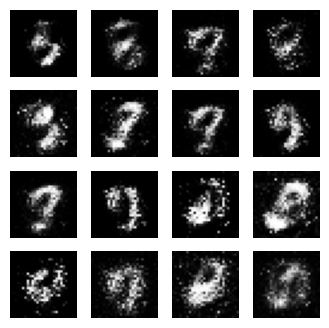

5000 [D loss: 0.190283 , acc: 91.80] [G loss: 5.010380]


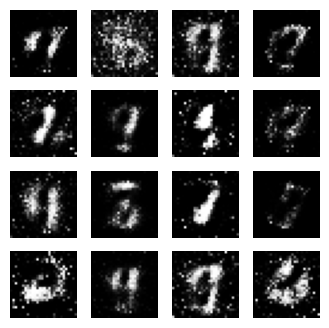

6000 [D loss: 0.173086 , acc: 94.53] [G loss: 5.133588]


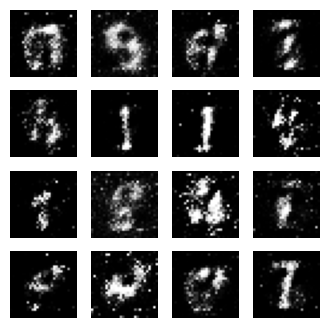

7000 [D loss: 0.333288 , acc: 86.72] [G loss: 4.727870]


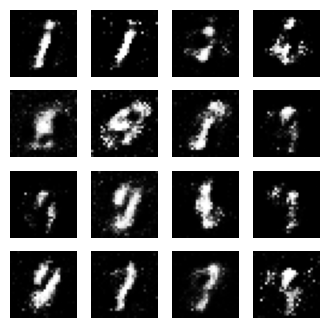

8000 [D loss: 0.209082 , acc: 92.19] [G loss: 3.764715]


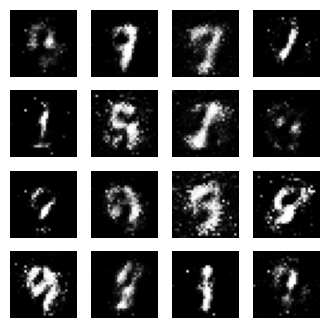

9000 [D loss: 0.261520 , acc: 87.89] [G loss: 4.253181]


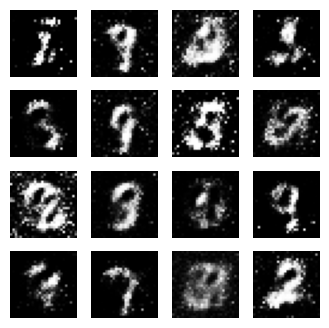

10000 [D loss: 0.334041 , acc: 83.98] [G loss: 4.390504]


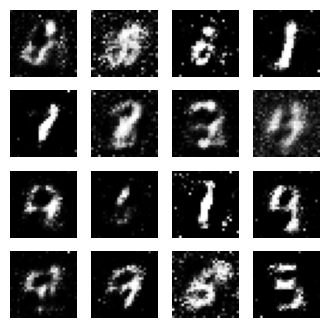

11000 [D loss: 0.334245 , acc: 86.72] [G loss: 4.458747]


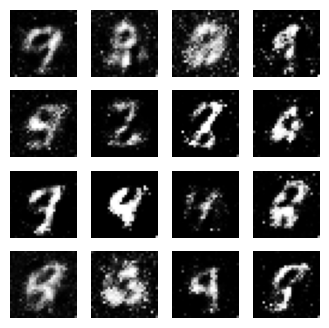

2024-02-06 12:54:54.247911: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled
2024-02-06 12:55:18.146347: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


12000 [D loss: 0.490289 , acc: 80.47] [G loss: 3.938875]


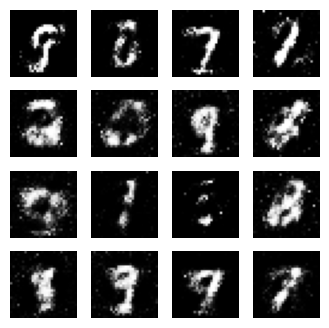

13000 [D loss: 0.428921 , acc: 81.64] [G loss: 3.051794]


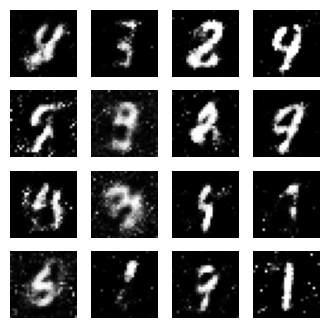

2024-02-06 12:57:28.195378: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


14000 [D loss: 0.338189 , acc: 87.50] [G loss: 3.596271]


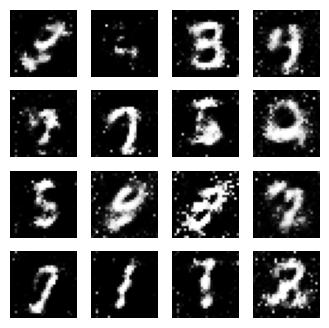

15000 [D loss: 0.272974 , acc: 87.50] [G loss: 2.981826]


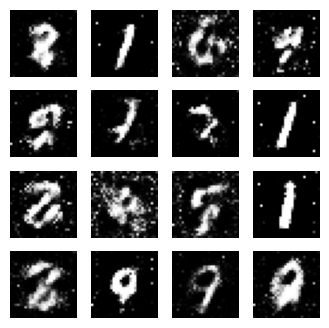

16000 [D loss: 0.343182 , acc: 85.16] [G loss: 2.660640]


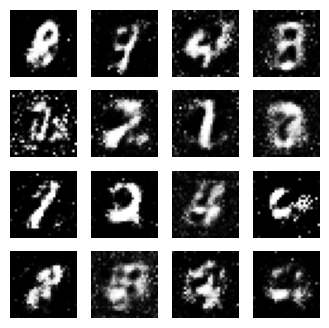

2024-02-06 13:05:09.588726: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


17000 [D loss: 0.305528 , acc: 88.67] [G loss: 2.928599]


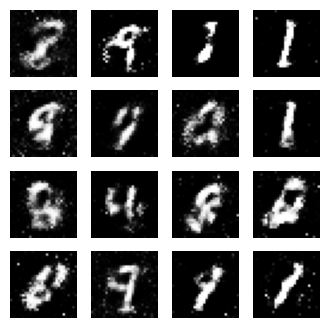

18000 [D loss: 0.453319 , acc: 77.34] [G loss: 3.134685]


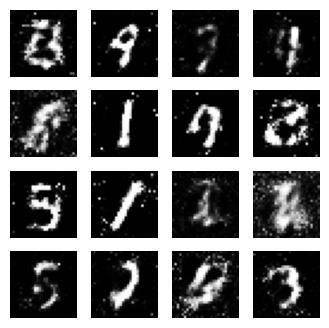

2024-02-06 13:07:45.065545: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


19000 [D loss: 0.232502 , acc: 91.02] [G loss: 3.285298]


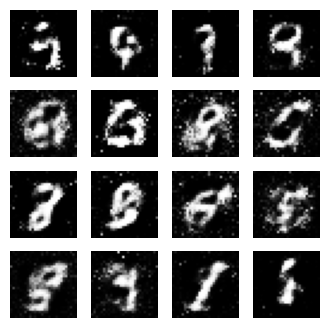

20000 [D loss: 0.260955 , acc: 87.89] [G loss: 3.413023]


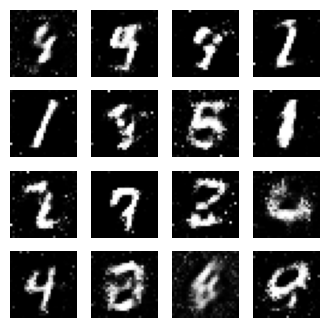

2024-02-06 13:12:00.211979: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


21000 [D loss: 0.349022 , acc: 85.16] [G loss: 3.179535]


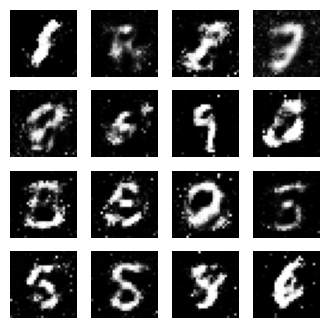

22000 [D loss: 0.546197 , acc: 76.95] [G loss: 2.802332]


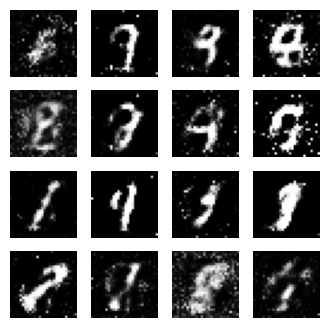

23000 [D loss: 0.297595 , acc: 86.33] [G loss: 2.857949]


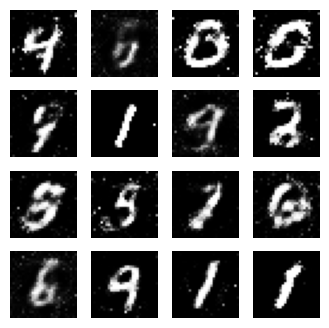

24000 [D loss: 0.318852 , acc: 85.16] [G loss: 2.682851]


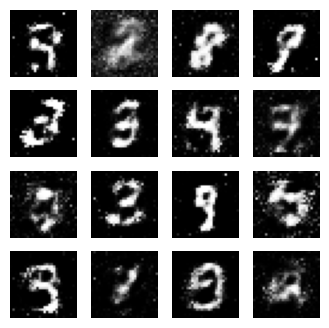

25000 [D loss: 0.398161 , acc: 83.59] [G loss: 2.791091]


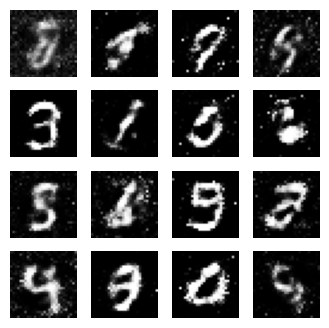

26000 [D loss: 0.356033 , acc: 83.59] [G loss: 2.730631]


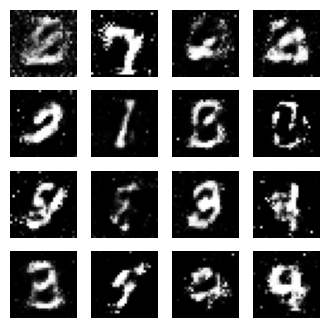

27000 [D loss: 0.331310 , acc: 87.11] [G loss: 2.449673]


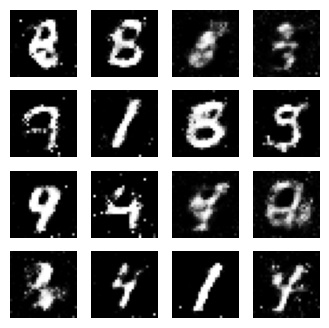

28000 [D loss: 0.427743 , acc: 82.81] [G loss: 2.793561]


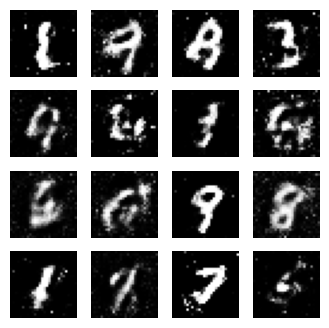

29000 [D loss: 0.420506 , acc: 81.25] [G loss: 2.230478]


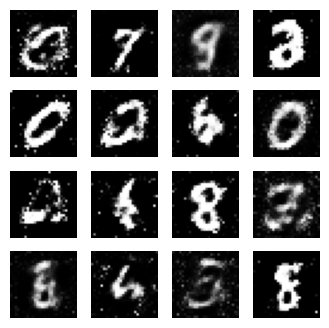

30000 [D loss: 0.435866 , acc: 80.47] [G loss: 2.473092]


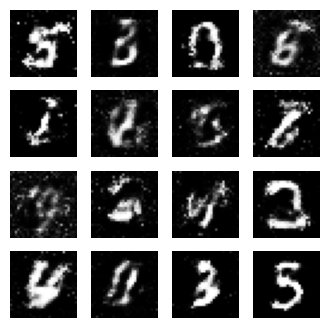

2024-02-06 13:33:28.309080: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


31000 [D loss: 0.483968 , acc: 77.73] [G loss: 2.381098]


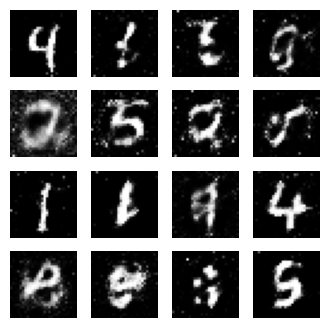

2024-02-06 13:34:58.658734: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


32000 [D loss: 0.475633 , acc: 75.78] [G loss: 2.094331]


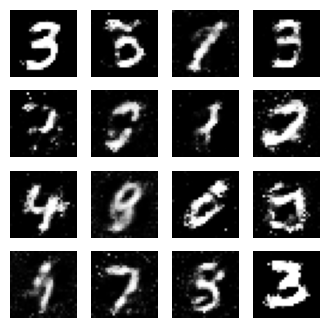

33000 [D loss: 0.565559 , acc: 73.83] [G loss: 2.222256]


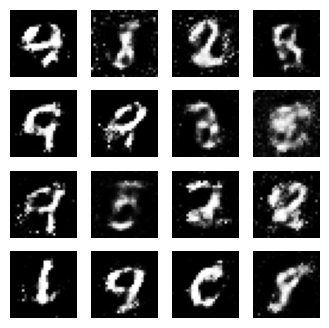

34000 [D loss: 0.504877 , acc: 78.91] [G loss: 2.019286]


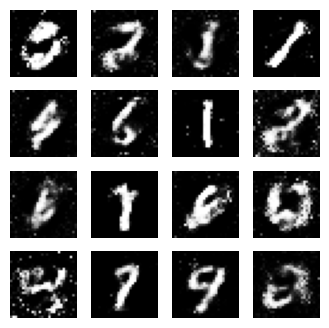

2024-02-06 13:41:55.338467: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


35000 [D loss: 0.394811 , acc: 82.81] [G loss: 2.585099]


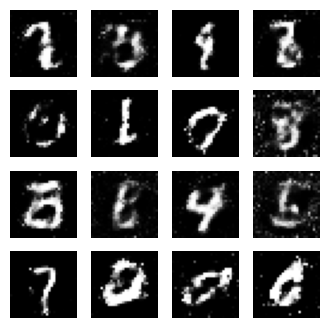

36000 [D loss: 0.471788 , acc: 78.91] [G loss: 2.123453]


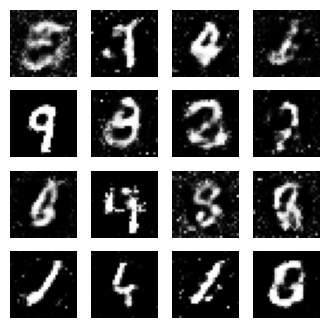

37000 [D loss: 0.393322 , acc: 83.59] [G loss: 2.208727]


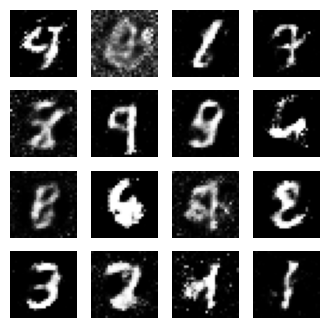

38000 [D loss: 0.434890 , acc: 79.30] [G loss: 2.284450]


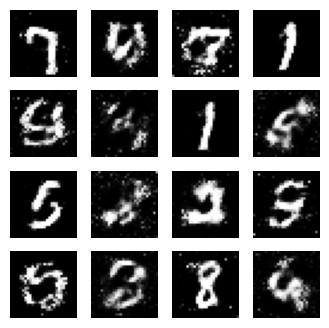

39000 [D loss: 0.398225 , acc: 82.03] [G loss: 2.161886]


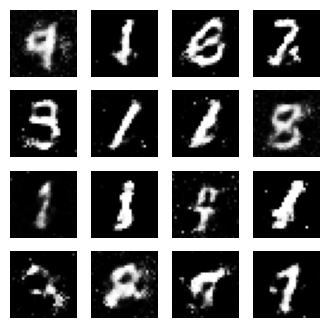

2024-02-06 13:52:46.863789: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


40000 [D loss: 0.445246 , acc: 79.30] [G loss: 2.418856]


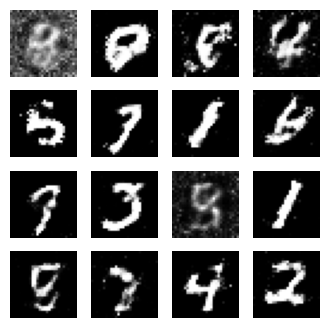

41000 [D loss: 0.469415 , acc: 77.73] [G loss: 1.796765]


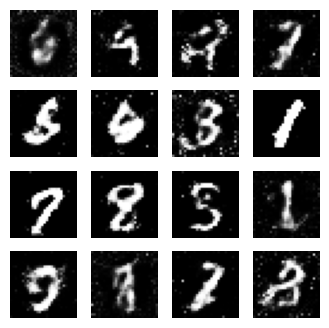

42000 [D loss: 0.400082 , acc: 82.81] [G loss: 2.327692]


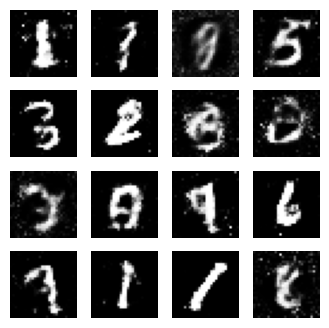

43000 [D loss: 0.565816 , acc: 71.88] [G loss: 2.066583]


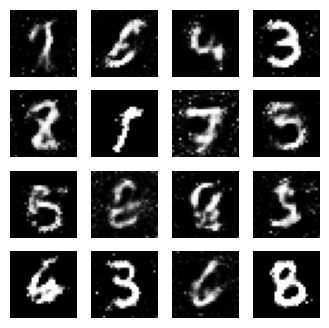

44000 [D loss: 0.402780 , acc: 82.03] [G loss: 2.281603]


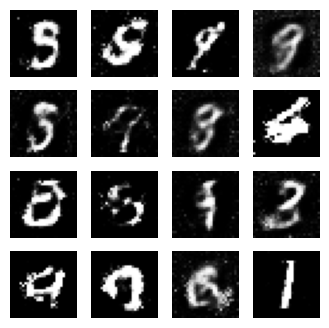

2024-02-06 14:02:54.802758: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled
2024-02-06 14:03:08.930302: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


45000 [D loss: 0.434008 , acc: 77.73] [G loss: 2.306465]


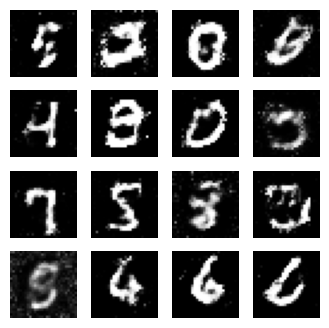

46000 [D loss: 0.353957 , acc: 83.98] [G loss: 2.723659]


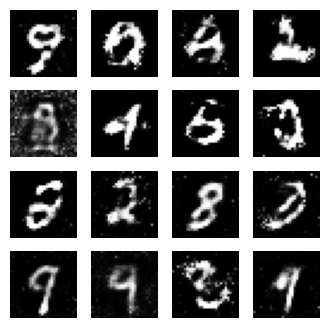

47000 [D loss: 0.371118 , acc: 84.38] [G loss: 2.702511]


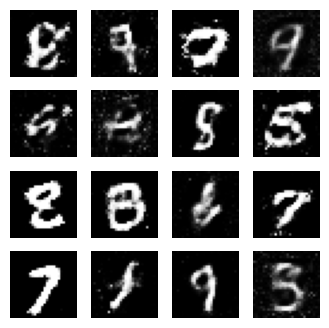

48000 [D loss: 0.358813 , acc: 82.42] [G loss: 2.017722]


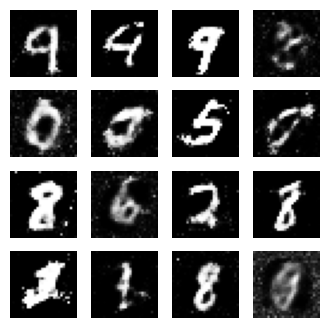

2024-02-06 14:11:37.625804: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


49000 [D loss: 0.345788 , acc: 84.38] [G loss: 2.323423]


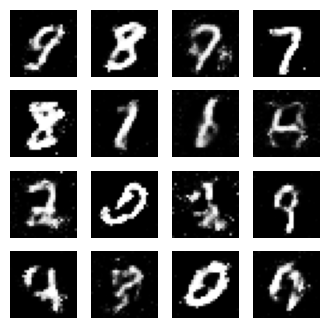

50000 [D loss: 0.466815 , acc: 80.08] [G loss: 2.083516]


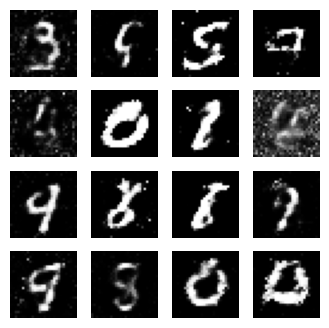

2024-02-06 14:15:31.302920: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


51000 [D loss: 0.485335 , acc: 77.34] [G loss: 2.032906]


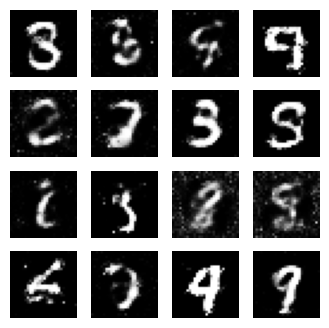

52000 [D loss: 0.351863 , acc: 85.55] [G loss: 2.218096]


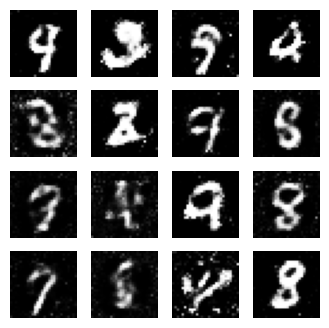

53000 [D loss: 0.471173 , acc: 74.61] [G loss: 1.913117]


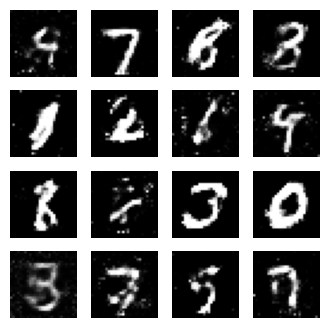

54000 [D loss: 0.530415 , acc: 71.48] [G loss: 2.078032]


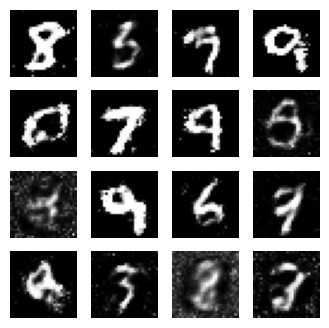

55000 [D loss: 0.452458 , acc: 78.52] [G loss: 2.432709]


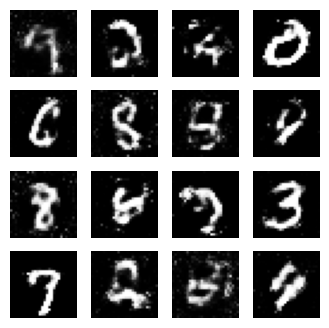

2024-02-06 14:24:54.196033: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


56000 [D loss: 0.390525 , acc: 81.25] [G loss: 2.276891]


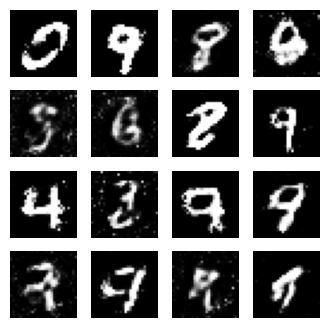

57000 [D loss: 0.442282 , acc: 78.52] [G loss: 1.903041]


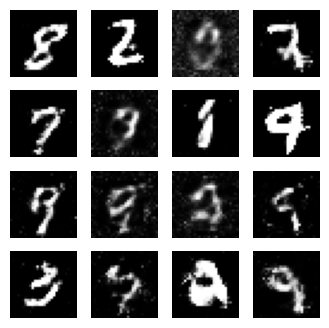

2024-02-06 14:29:08.962992: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled
2024-02-06 14:30:28.329749: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


58000 [D loss: 0.443578 , acc: 78.52] [G loss: 2.191828]


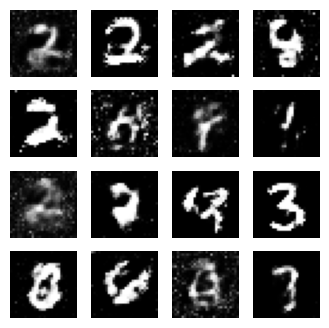

59000 [D loss: 0.360737 , acc: 85.55] [G loss: 1.858247]


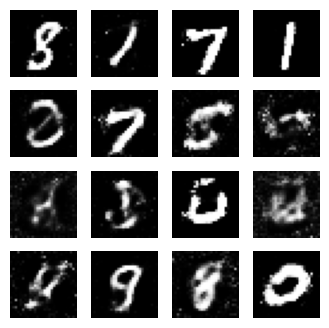

2024-02-06 14:33:03.420399: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


60000 [D loss: 0.430006 , acc: 81.64] [G loss: 2.422961]


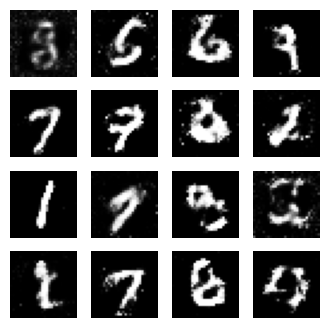

61000 [D loss: 0.331846 , acc: 85.55] [G loss: 2.032947]


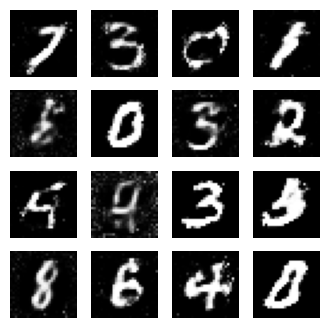

62000 [D loss: 0.383765 , acc: 82.42] [G loss: 1.882822]


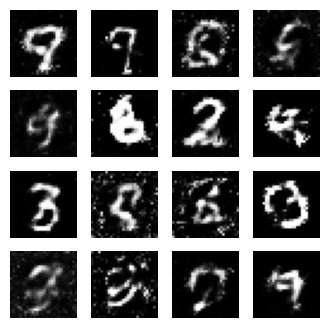

2024-02-06 14:40:47.237373: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


63000 [D loss: 0.491719 , acc: 77.73] [G loss: 2.061990]


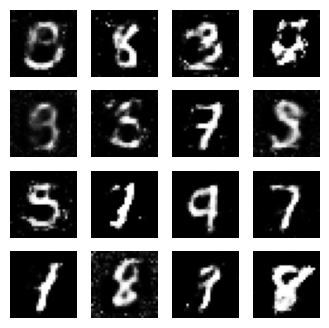

2024-02-06 14:41:32.276831: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


64000 [D loss: 0.470497 , acc: 76.56] [G loss: 2.237303]


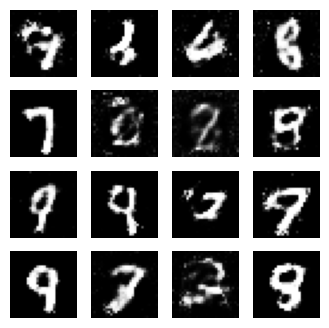

65000 [D loss: 0.363287 , acc: 83.20] [G loss: 2.496788]


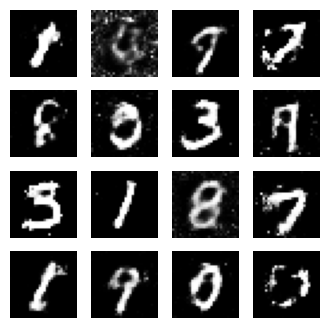

66000 [D loss: 0.417590 , acc: 80.86] [G loss: 1.880704]


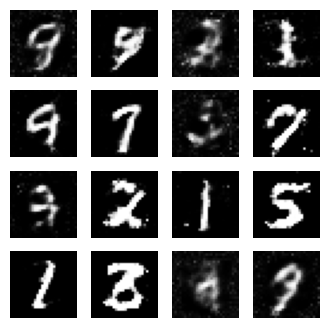

2024-02-06 14:48:03.213842: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


67000 [D loss: 0.368271 , acc: 84.38] [G loss: 2.014809]


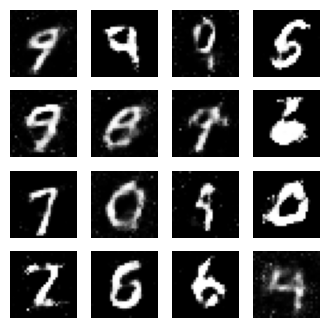

2024-02-06 14:50:02.373899: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


68000 [D loss: 0.463159 , acc: 78.52] [G loss: 2.192639]


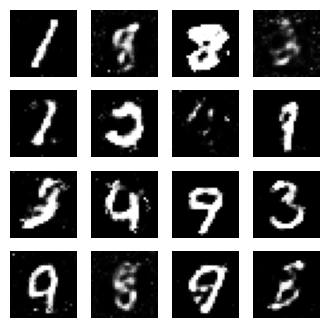

69000 [D loss: 0.382477 , acc: 83.20] [G loss: 2.006268]


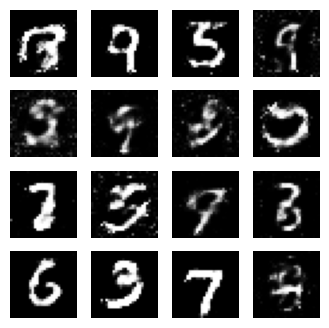

2024-02-06 14:55:15.392445: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


70000 [D loss: 0.498217 , acc: 78.12] [G loss: 2.585570]


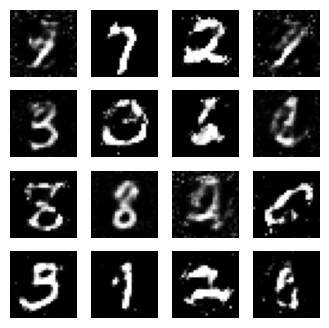

2024-02-06 14:56:01.176593: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


71000 [D loss: 0.443341 , acc: 79.30] [G loss: 2.024652]


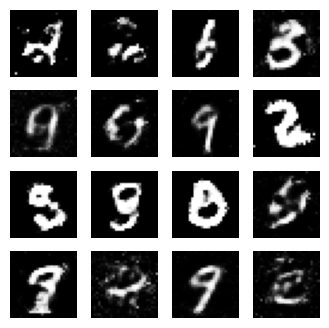

2024-02-06 14:58:57.355257: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


72000 [D loss: 0.452343 , acc: 81.64] [G loss: 2.080032]


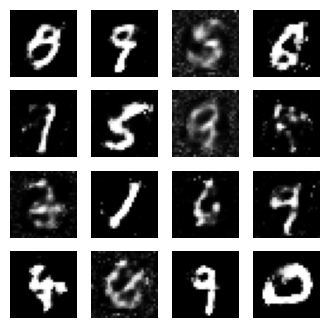

73000 [D loss: 0.382998 , acc: 84.38] [G loss: 2.277450]


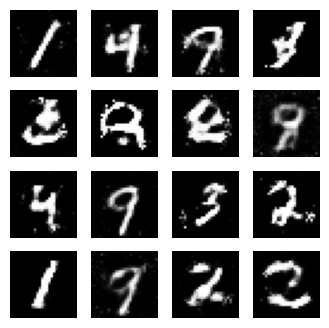

74000 [D loss: 0.392591 , acc: 81.25] [G loss: 2.417551]


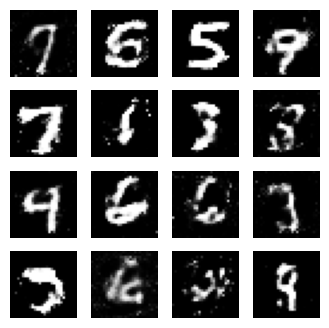

75000 [D loss: 0.422511 , acc: 80.08] [G loss: 2.248996]


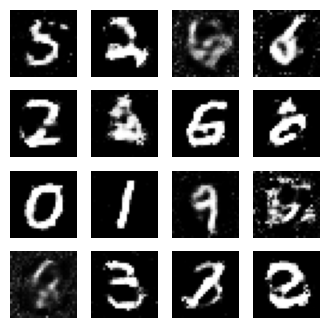

76000 [D loss: 0.394469 , acc: 82.81] [G loss: 2.196302]


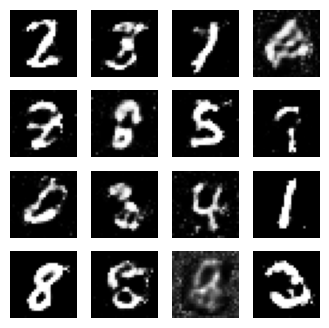

77000 [D loss: 0.401176 , acc: 83.20] [G loss: 2.074332]


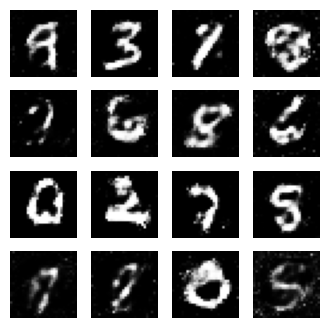

2024-02-06 15:12:01.906843: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


78000 [D loss: 0.380460 , acc: 84.38] [G loss: 2.488928]


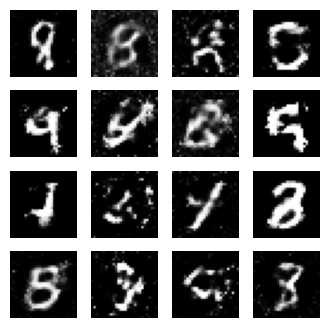

79000 [D loss: 0.441520 , acc: 82.42] [G loss: 2.148679]


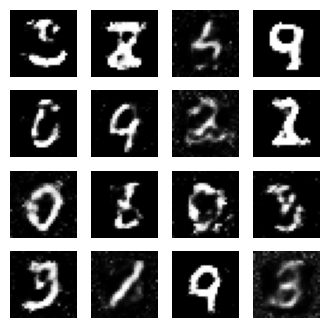

80000 [D loss: 0.379164 , acc: 80.86] [G loss: 2.268846]


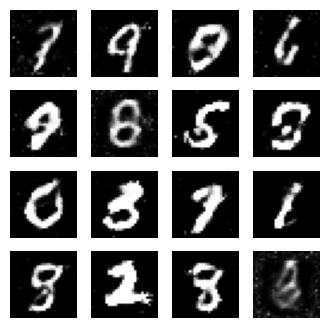

2024-02-06 15:16:37.172588: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


81000 [D loss: 0.361605 , acc: 82.81] [G loss: 2.608413]


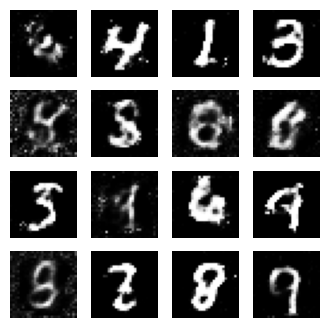

82000 [D loss: 0.353887 , acc: 83.20] [G loss: 2.240259]


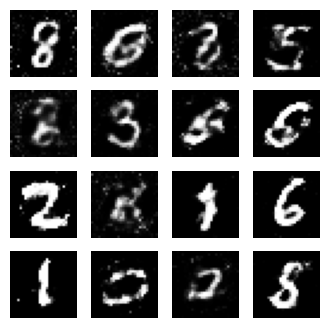

2024-02-06 15:21:55.907292: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


83000 [D loss: 0.387332 , acc: 82.42] [G loss: 2.353269]


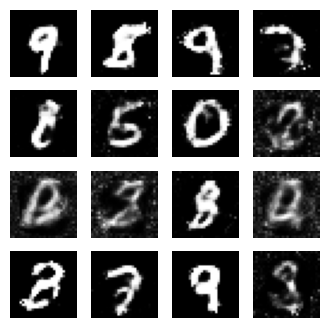

84000 [D loss: 0.489221 , acc: 77.34] [G loss: 2.228102]


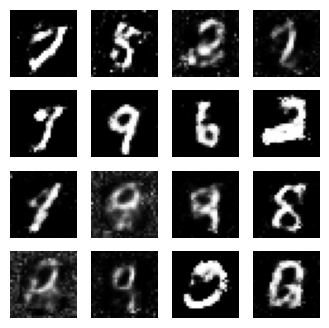

85000 [D loss: 0.460567 , acc: 78.91] [G loss: 2.024081]


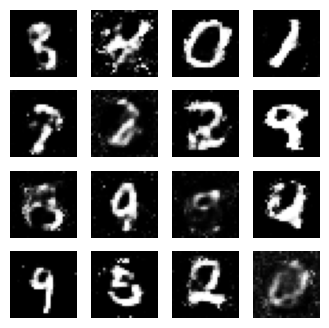

2024-02-06 15:27:10.303833: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


86000 [D loss: 0.379748 , acc: 78.52] [G loss: 1.967000]


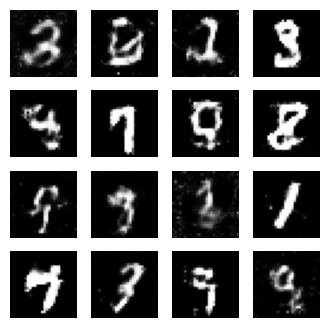

87000 [D loss: 0.412938 , acc: 81.25] [G loss: 2.171131]


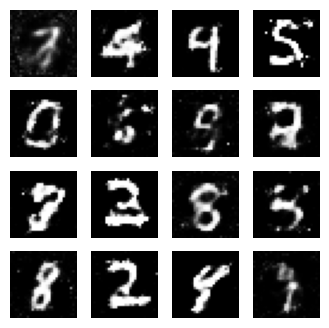

88000 [D loss: 0.461645 , acc: 78.52] [G loss: 2.031671]


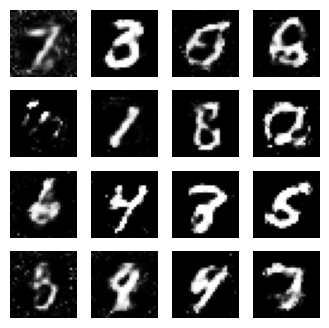

2024-02-06 15:34:38.785748: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


89000 [D loss: 0.361776 , acc: 83.98] [G loss: 2.370170]


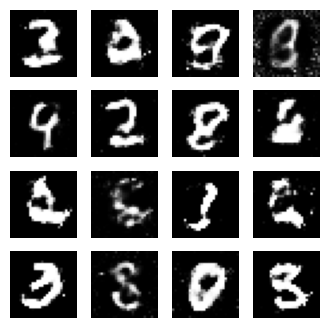

90000 [D loss: 0.414049 , acc: 78.52] [G loss: 2.073563]


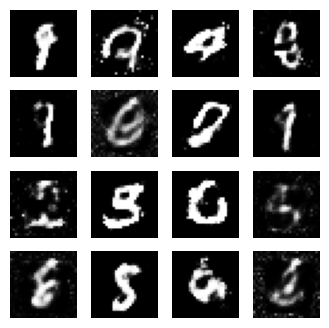

91000 [D loss: 0.470230 , acc: 80.08] [G loss: 1.970046]


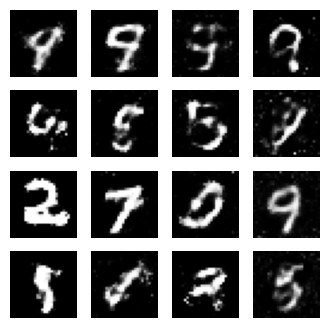

92000 [D loss: 0.351947 , acc: 83.98] [G loss: 2.522989]


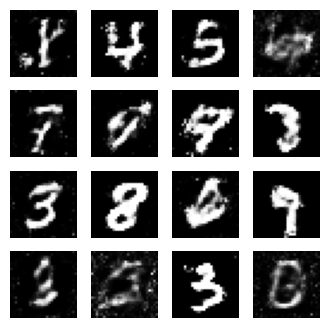

2024-02-06 15:42:39.462449: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


93000 [D loss: 0.429959 , acc: 77.34] [G loss: 1.788682]


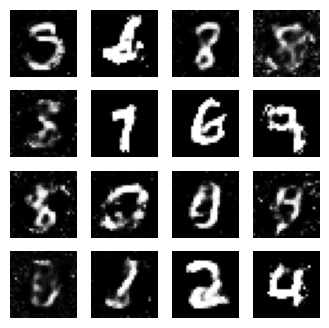

94000 [D loss: 0.469360 , acc: 75.78] [G loss: 2.511312]


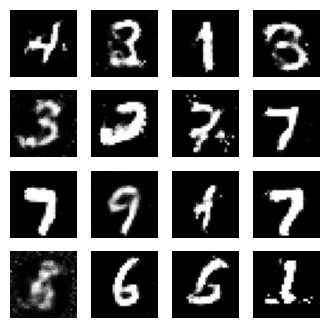

95000 [D loss: 0.392879 , acc: 83.59] [G loss: 2.350544]


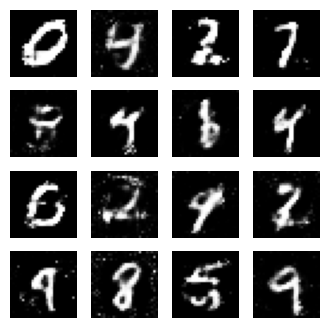

96000 [D loss: 0.423010 , acc: 78.52] [G loss: 2.275730]


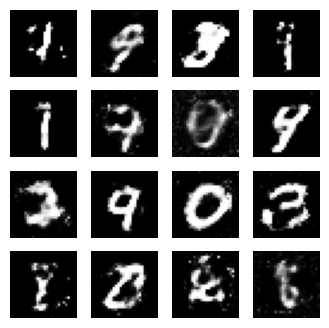

97000 [D loss: 0.483825 , acc: 76.17] [G loss: 2.314299]


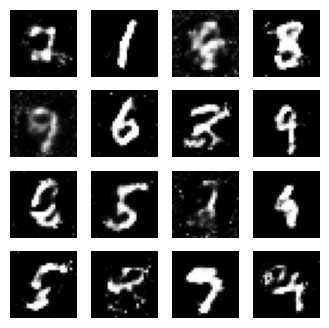

98000 [D loss: 0.475327 , acc: 75.78] [G loss: 2.251023]


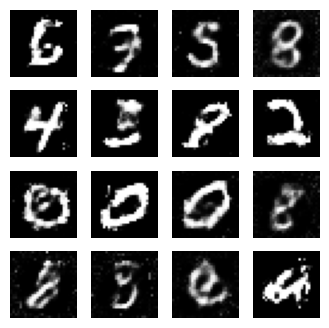

99000 [D loss: 0.414751 , acc: 81.25] [G loss: 2.424045]


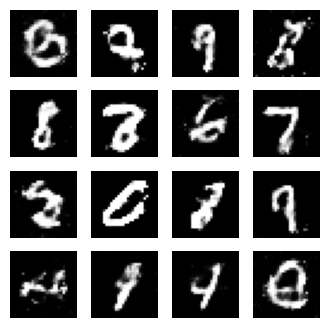

100000 [D loss: 0.365833 , acc: 84.38] [G loss: 2.168471]


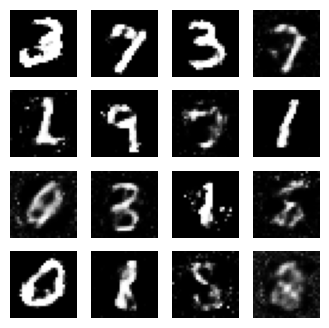

In [13]:
train(100000,128,1000)